In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib

Load dataset

In [32]:
data = sns.load_dataset("penguins")

data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Data cleaning and feature selection

In [33]:
features = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm"
]

data = data.dropna(subset=features + ["species"])

X = data[features]
y = data["species"]

Encode target labels

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Split the dataset into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

X_train.shape, X_test.shape

((273, 3), (69, 3))

Train Random Forest model

In [36]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model evaluation

In [37]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Random forest accuracy: ", accuracy)
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Random forest accuracy:  0.9855072463768116

Classification report:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      0.93      0.96        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



Visualize prediction errors

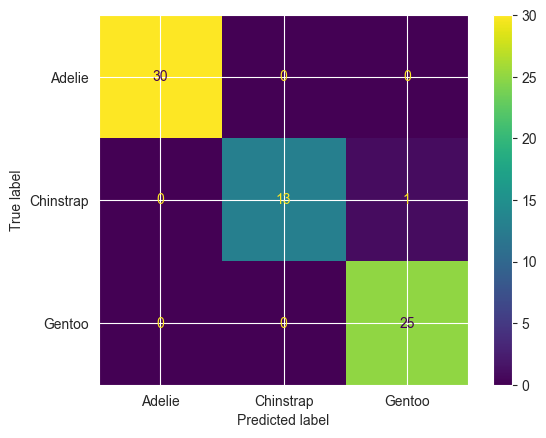

In [38]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot()
plt.show()

Save trained model

In [41]:
joblib.dump(model, "penguin_rf_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

Make predictions on new data

In [40]:
sample = pd.DataFrame([{
    "bill_length_mm": 43,
    "bill_depth_mm": 12,
    "flipper_length_mm": 250
}])

pred = model.predict(sample)
species = le.inverse_transform(pred)

print("Predicted species:", species[0])

Predicted species: Gentoo
